## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

### Zoe Gates, gzp2eu ###

### My Variables ###
I chose 7 variables to include in my GSS subset for this lab. They are wrkstat, marital, divorce, childs, age, educ, and degree. Many of the variables I attempted to initially download from GSS would show up as inapplicable through all of the years. This often involved hours worked. So, I chose more stagnant variables that would be timeless through the years on this census.

wrkstat: workstatus of the respondent. Could be interesting to examine in accordance with other variables, suchas childs (or the number of children). We can attempted to tell stories about how professional versus personal lives relate.

martial: marital status of the respondent. This variable is another characteristic of personal life. We could use it to examine the relationships between marital status and number of children, and marital status and highest education achieved. I chose it to examine how married life further plays out with career status and childbearing.

divorce: has the respondent had a divorce. Increasingly, I hear people talking about the rising rates of divorce. I'm not sure that this is true, and I was thinking of playing with this variable in a timeseries (I could do this using seaborn).

childs: the number of children the respondent has. It would be interesting to see how a factor such as age affects the number of children adults have. Additionally, with work culture growing increasingly important, it would be interesting to see if there's anything telling between these two variables.

age: age of the respondent. This variable is very versatile, and it could be important in examining relationships between marital status, divorce status, and degree achievement. 

educ: the highest level of highschool completed by the respondent. The educ variable can help us single out who did not finish highschool. We could then use this information to examine the current wrkstatus of the respondent. We can answer question such as, how important is secondary education really?

degree: the highest college degree achieved by the respondent. Much like educ, the degree variable could help us recognize how degree achievement offers opportunities for work. Are people with degrees also widely unemployed? If we look at this variable in 2008, during the Great Recession, we could draw conclusions about how degree-holding adults were affected (and compare this to a year like 2005).

In [3]:
#Importing necessary packages to load the data into my python environement and conduct EDA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
#The GSS is downloaded as an old version of excel, this would involve specifying an engine to use. Instead I'm converting it to a CSV using Pandas, and downloading this file back into the same folder on my local device.
pd.read_excel('C:/Users/gates/Downloads/lab eda subset final/batch_0/result/GSS.xlsx', engine='openpyxl').to_csv('C:/Users/gates/Downloads/lab eda subset final/batch_0/result/GSS.csv', index=False)

In [5]:
#Reading my CSV file in
gss= pd.read_csv('C:/Users/gates/Downloads/lab eda subset final/batch_0/result/GSS.csv')

In [6]:
gss.head() #Checking that it was properly read into my environment.

,year,id_,wrkstat,marital,divorce,childs,age,educ,degree
0,1972,1,Working full time,Never married,.i: Inapplicable,0,23,4 years of college,Bachelor's
1,1972,2,Retired,Married,NO,5,70,10th grade,Less than high school
2,1972,3,Working part time,Married,NO,4,48,12th grade,High school
3,1972,4,Working full time,Married,NO,0,27,5 years of college,Bachelor's
4,1972,5,Keeping house,Married,NO,2,61,12th grade,High school


In [7]:
gss['year'].describe() #Checking to see what years the data spans

count    72390.000000
mean      1997.715541
std         15.109995
min       1972.000000
25%       1985.000000
50%       1998.000000
75%       2010.000000
max       2022.000000
Name: year, dtype: float64

#### Data Cleaning ####
##### This data is very clean compared to many real-life datasets out there, I'm just going to orient it towards the simple EDA I plan on conducting ######

In [9]:
gss['divorce'].value_counts() #Looking at the values present in the divorce variable

divorce
NO                                34738
.i:  Inapplicable                 28000
YES                                9366
.n:  No answer                      271
.s:  Skipped on Web                  12
.d:  Do not Know/Cannot Choose        3
Name: count, dtype: int64

In [10]:
#This variable is clean, but there are a few values with prefixes that are recorded separately and all involve some non-answer or skip. I'm going to group them in this variable and future variables
gss['divorce']= gss['divorce'].replace([".s:  Skipped on Web",".d:  Do not Know/Cannot Choose",".i:  Inapplicable",".n:  No answer"],"UNCERTAIN") #Replacing all of the no answers, skips, and inapplicables with variable "UNCERTAIN,' since we mainly care about "YES" and "NO" (but I don't want to drop data from these rows for other variables)
gss['divorce'].value_counts() #Checking that it imputed correctly

divorce
NO           34738
UNCERTAIN    28286
YES           9366
Name: count, dtype: int64

In [11]:
gss['childs'].value_counts()

childs
0                                 19927
2                                 18138
1                                 11495
3                                 11196
4                                  5753
5                                  2573
6                                  1328
8 or more                          1001
7                                   718
.d:  Do not Know/Cannot Choose      201
.n:  No answer                       33
.i:  Inapplicable                    16
.s:  Skipped on Web                  11
Name: count, dtype: int64

In [12]:
#Childs variable, fairly clean
gss['childs']=gss['childs'].replace ([".d:  Do not Know/Cannot Choose", ".n:  No answer", ".i:  Inapplicable", ".s:  Skipped on Web"], "uncertain") #Similarly to the divorce variable, imputing all of the non-numeric and uncertain variables to "uncertain"
gss['childs'].value_counts() #Checking that this was successful

childs
0            19927
2            18138
1            11495
3            11196
4             5753
5             2573
6             1328
8 or more     1001
7              718
uncertain      261
Name: count, dtype: int64

In [13]:
gss["educ"].value_counts() #Checking the educ column to what sort of cleaning we should do

educ
12th grade                        21401
4 years of college                 9994
2 years of college                 8208
1 year of college                  5905
11th grade                         3942
3 years of college                 3307
10th grade                         3010
6 years of college                 2945
8th grade                          2786
5 years of college                 2392
9th grade                          2172
8 or more years of college         1803
7 years of college                 1112
7th grade                           896
6th grade                           866
5th grade                           410
4th grade                           326
3rd grade                           268
No formal schooling                 177
.n:  No answer                      172
2nd grade                           158
.d:  Do not Know/Cannot Choose       91
1st grade                            49
Name: count, dtype: int64

In [14]:
#This variable is clean, but busy. I mainly planned on using this variable to distinguish between having some college education and not, so I will organize it into high school and below and college (the degree variable can help me look more into the specifics of college education)
gss.loc[gss['educ'].str.contains("college", na=False), 'educ']= "some or all college" #Locating all responses that include college and categorizing those to a college education
gss.loc[gss['educ'].str.contains("grade", na=False), 'educ']= "high school or below" #Location all responses that include high school and categorizing those to a high school or below education
gss['educ']=gss['educ'].replace([".n:  No answer",".d:  Do not Know/Cannot Choose"], "unknown") #Taking the unreported variables and casting them into an unknown response
gss['educ']=gss['educ'].str.lower() #Making sure the values are consistent by making all of the strings lowercase
gss['educ'].value_counts() #Checking that all of this was completed successfully

educ
high school or below    36284
some or all college     35666
unknown                   263
no formal schooling       177
Name: count, dtype: int64

In [15]:
gss["wrkstat"].value_counts() #Checking the wrkstat variable contents

wrkstat
Working full time                                                             35267
Retired                                                                       10886
Keeping house                                                                 10764
Working part time                                                              7430
Unemployed, laid off, looking for work                                         2621
In school                                                                      2187
Other                                                                          1643
With a job, but not at work because of temporary illness, vacation, strike     1556
.n:  No answer                                                                   26
.s:  Skipped on Web                                                               9
.d:  Do not Know/Cannot Choose                                                    1
Name: count, dtype: int64

In [16]:
#This is a fairly clean variable, for the purpose of my EDA I'm not going to change much
gss["wrkstat"]=gss["wrkstat"].replace("With a job, but not at work because of temporary illness, vacation, strike", "Working prolonged leave") #Fairly long variable name, changing justification to more general "prolonged leave"
gss["wrkstat"]=gss["wrkstat"].replace([".n:  No answer", ".s:  Skipped on Web", ".d:  Do not Know/Cannot Choose"],"Unreported") #Taking all "Do not know/Cannot Choose", skips, and non answers and naming them "unreported"
gss["wrkstat"].value_counts() #Verifying

wrkstat
Working full time                         35267
Retired                                   10886
Keeping house                             10764
Working part time                          7430
Unemployed, laid off, looking for work     2621
In school                                  2187
Other                                      1643
Working prolonged leave                    1556
Unreported                                   36
Name: count, dtype: int64

In [17]:
gss["marital"].value_counts() #Examining the "marital" variable

marital
Married                           37596
Never married                     15904
Divorced                           9642
Widowed                            6756
Separated                          2441
.n:  No answer                       37
.s:  Skipped on Web                  12
.d:  Do not Know/Cannot Choose        2
Name: count, dtype: int64

In [18]:
#This is clean, going to group prefixed variables into "Unreported"
gss['marital']= gss["marital"].replace([".n:  No answer", ".s:  Skipped on Web", ".d:  Do not Know/Cannot Choose"], "Unreported") #Combining the three prefixed variables into one variable: 'unreported'
gss["marital"].value_counts() #Verifying

marital
Married          37596
Never married    15904
Divorced          9642
Widowed           6756
Separated         2441
Unreported          51
Name: count, dtype: int64

In [19]:
gss['degree'].value_counts()

degree
High school                       36446
Less than high school             14192
Bachelor's                        11248
Graduate                           5953
Associate/junior college           4355
.n:  No answer                      143
.d:  Do not Know/Cannot Choose       44
.s:  Skipped on Web                   9
Name: count, dtype: int64

In [20]:
gss['degree']=gss['degree'].replace([".n:  No answer",".d:  Do not Know/Cannot Choose",".s:  Skipped on Web"],"Unreported") #Replacing unedfined values with "unreported"
gss['degree'].value_counts() #Checking to make sure this went through and all of the other values look ok

degree
High school                 36446
Less than high school       14192
Bachelor's                  11248
Graduate                     5953
Associate/junior college     4355
Unreported                    196
Name: count, dtype: int64

In [21]:
gss['age'].value_counts()

age
30                                1571
32                                1566
34                                1552
28                                1548
33                                1526
                                  ... 
85                                 221
86                                 211
87                                 158
88                                 130
.d:  Do not Know/Cannot Choose       1
Name: count, Length: 75, dtype: int64

In [22]:
gss.drop(gss[gss['age'].isin([".d:  Do not Know/Cannot Choose", ".i:  Inapplicable"])].index, inplace=True)

In [23]:
gss['age'].dtype #Checking the type of variable that age is

dtype('O')

In [24]:
gss['age'] = pd.to_numeric(gss['age'], errors='coerce') #Casting the variables to numeric so we can conduct EDA on them

In [25]:
gss['age'].value_counts() #Verifying

age
30.0    1571
32.0    1566
34.0    1552
28.0    1548
33.0    1526
        ... 
18.0     267
85.0     221
86.0     211
87.0     158
88.0     130
Name: count, Length: 71, dtype: int64

#### EDA and Visualization ####

###### Respondent Age Analysis ######

count    71212.000000
mean        46.312209
std         17.353604
min         18.000000
25%         32.000000
50%         44.000000
75%         60.000000
max         88.000000
Name: age, dtype: float64


Text(0.5, 1.0, 'Age Distribution of GSS Respondents')

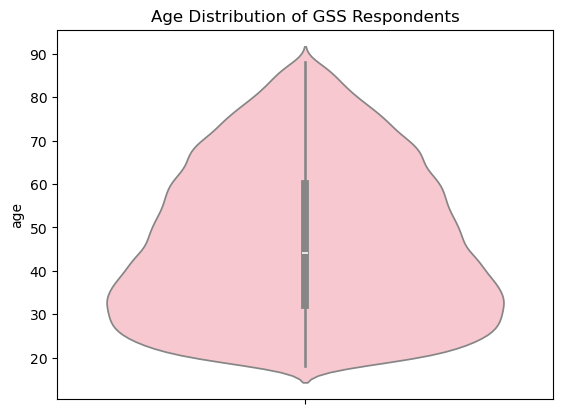

In [28]:
print(gss['age'].describe()) #Printing out summary statistics for the respondent age columns
sns.violinplot(gss['age'], color='pink') #Using a simple box plot to visualize where the majority of respondents fall
plt.title('Age Distribution of GSS Respondents')

###### Age Separated by Marital Type ######

<Axes: xlabel='age', ylabel='Density'>

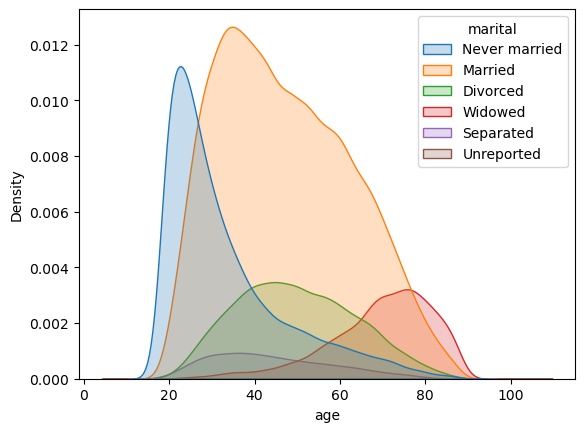

In [108]:
sns.kdeplot(data=gss, x='age', hue='marital', fill=True, common_norm=True) #Creating a kernel density plot

###### Divorce Timeseries ######

Text(0.5, 1.0, 'Number of Divorces per Year Recorded by the GSS')

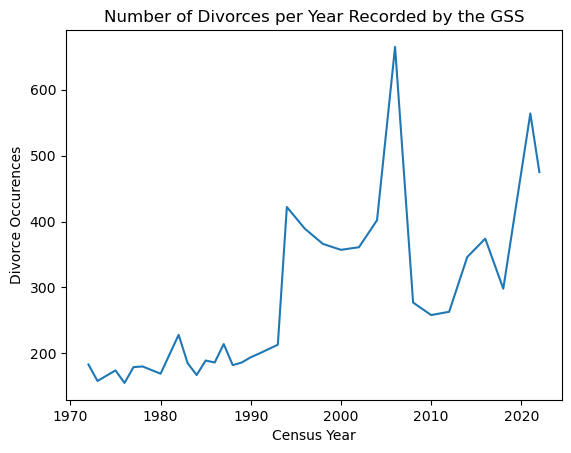

In [32]:
divorce_rt = gss[gss['divorce'] == "YES"].groupby('year').size()
sns.lineplot(data=divorce_rt, markers=True)
plt.xlabel("Census Year")
plt.ylabel("Divorce Occurences")
plt.title("Number of Divorces per Year Recorded by the GSS")

###### Cross Tabulation of # of Children and Adult Education (General) ######

In [34]:
pd.crosstab(gss['childs'],gss['educ'], normalize="index")*100 #Cross tabulating # of children and education level, normalizing by row and reduce sample size bias

educ,high school or below,no formal schooling,some or all college,unknown
childs,,,,
0,38.813107,0.221473,60.658378,0.307042
1,50.039284,0.122217,49.480576,0.357922
2,49.206086,0.105118,50.456432,0.232365
3,55.166547,0.196991,44.412607,0.223854
4,61.841646,0.366236,37.460760,0.331357
5,69.894982,0.233372,29.521587,0.350058
6,72.117558,0.828937,26.375283,0.678222
7,72.701950,1.114206,25.766017,0.417827
8 or more,81.062124,2.705411,15.531062,0.701403


###### Total Number of Children per Household 2022 ######

In [36]:
child_22 = gss[gss['year'] == 2022] #Creating a subset with observations from my GSS jsut from the year 2022
child_22.head()

,year,id_,wrkstat,marital,divorce,childs,age,educ,degree
68846,2022,1,Working full time,Divorced,UNCERTAIN,1,72.0,some or all college,Bachelor's
68847,2022,2,Retired,Married,NO,2,80.0,some or all college,Graduate
68848,2022,3,Working full time,Divorced,UNCERTAIN,1,57.0,high school or below,High school
68849,2022,4,Working prolonged leave,Never married,UNCERTAIN,0,23.0,some or all college,Bachelor's
68850,2022,5,Other,Never married,UNCERTAIN,2,62.0,some or all college,High school


Text(0.5, 1.0, 'Number of Children in Respondent Household 2022')

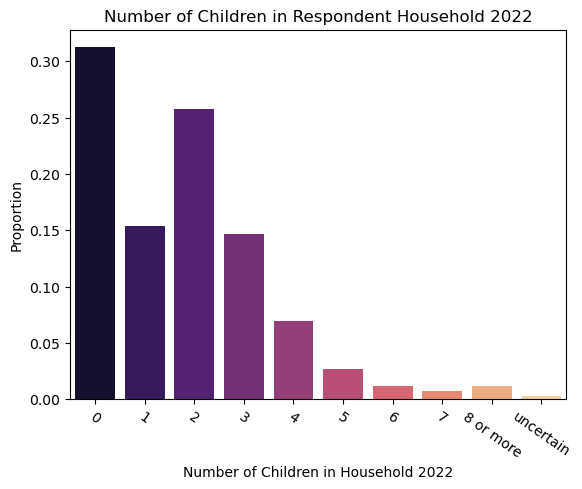

In [37]:
child_counts = child_22['childs'].value_counts(normalize=True).sort_index() #Creating a list of value counts for the childs variable in order to plt on the y
sns.barplot(x=child_counts.index, y=child_counts.values, hue=child_counts.index, width=0.8, palette="magma") #Creating a barplot to plot the # of children each respondent has in 2022
plt.xlabel('Number of Children in Household 2022') #Labeling x axis
plt.ylabel('Proportion') #Labeling y axis
plt.xticks(rotation=325) #Rotating the tick labels so the writing doesn't interfere 
plt.title("Number of Children in Respondent Household 2022") #Giving the plot a title

###### Total # of Children per Household 1972 ######

Text(0.5, 1.0, 'Number of Children in Respondent Household 1972')

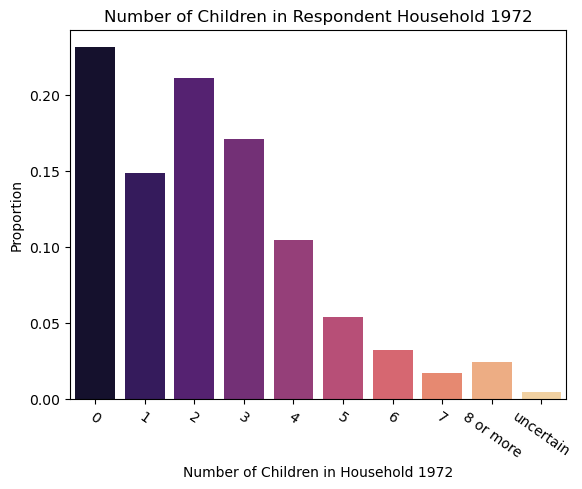

In [39]:
child_1972 = gss[gss['year'] == 1972] #Creating a subset with data just from 1972
child_counts = child_1972['childs'].value_counts(normalize=True).sort_index() #Creating a list of counts associated with each "childs" response
sns.barplot(x=child_counts.index, y=child_counts.values, hue=child_counts.index, width=0.8, palette="magma") #Creating a barplot
plt.xlabel('Number of Children in Household 1972') #Labeling the x axis
plt.ylabel('Proportion') #Labeling the y axis
plt.xticks(rotation=325) #Rotating the tick labels
plt.title("Number of Children in Respondent Household 1972") #Adding a title

###### Cross Tabulation of Specific Degree Received and Work Status at Time of Survey ######

In [41]:
pd.crosstab(gss['degree'],gss['wrkstat']) #Crosstabulating degree and work status

wrkstat,In school,Keeping house,Other,Retired,"Unemployed, laid off, looking for work",Unreported,Working full time,Working part time,Working prolonged leave
degree,,,,,,,,,
Associate/junior college,151,380,81,460,125,1,2527,489,121
Bachelor's,254,921,118,1372,258,9,6905,1082,273
Graduate,98,232,64,976,109,1,3759,514,154
High school,1297,5359,795,4810,1450,15,17801,4094,739
Less than high school,375,3821,568,3168,664,5,4097,1222,263
Unreported,9,36,9,37,6,3,71,14,1


In [42]:
fulltime=gss[gss['wrkstat']=='Working full time'] #Finding out what percentage of full time workers got at most a high school degree
17801/len(fulltime)

0.5062855517633674

###### Work Status During the Recession ######

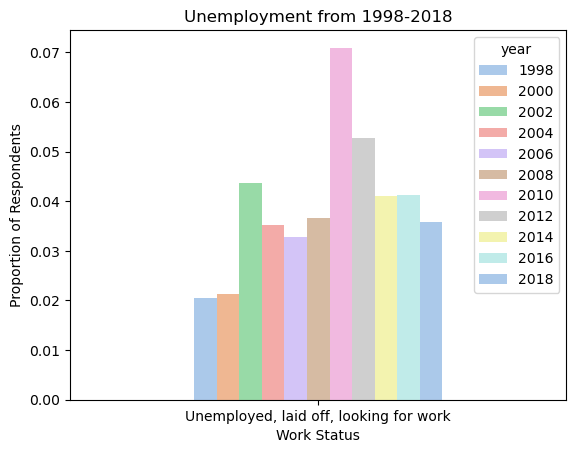

In [85]:
gss_rec_filtered = gss[(gss['year'] >= 1998) & (gss['year'] <= 2018)] #Filtering GSS data by years, 1998 to 2018
wrkstat_prop = gss_rec_filtered.groupby('year')['wrkstat'].value_counts(normalize=True).reset_index(name='proportion') #Grouping by Year on work status, and normalizing so that sample size doesn't affect my analysis 
wrkstat_prop = wrkstat_prop[wrkstat_prop['wrkstat'] == "Unemployed, laid off, looking for work"] #Just selecting the unemployed wrkstat
sns.barplot(x='wrkstat', y='proportion', hue='year', data=wrkstat_prop, palette='pastel', width=0.5) #Creating a barplot with the data
plt.xlabel('Work Status') #Adding x axis label
plt.ylabel('Proportion of Respondents') #Y axis label
plt.title('Unemployment from 1998-2018') #Title for plot
plt.show() #Showing plot

###### Unemployment Timeseries According to Degree ######

Text(0.5, 1.0, 'Unemployed People per Year in Accordance with Degree Status')

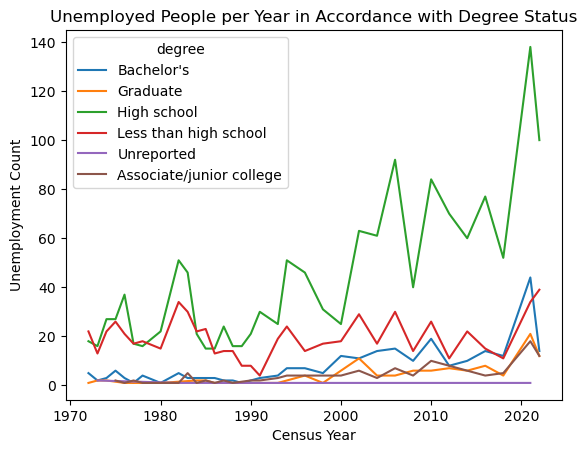

In [92]:
nowork = gss[gss['wrkstat'] == "Unemployed, laid off, looking for work"] #Filtering the data and creating a subset of unemployed respondents
nowork = nowork.groupby(['year', 'degree']).size().reset_index(name='count') #Grouping subset by year and degree
sns.lineplot(data=nowork, x='year', y='count', hue='degree') #PLoting timeseries of unemployement, with each line respresenting different degree
plt.xlabel("Census Year") #Labeling x axis
plt.ylabel("Unemployment Count") #Labeling y axis
plt.title("Unemployed People per Year in Accordance with Degree Status") #Adding title

###### Examining Marital Status Relationship with Degree Achievement ######

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0.5, 0, 'Associate/junior college'),
  Text(1.5, 0, "Bachelor's"),
  Text(2.5, 0, 'Graduate'),
  Text(3.5, 0, 'High school'),
  Text(4.5, 0, 'Less than high school'),
  Text(5.5, 0, 'Unreported')])

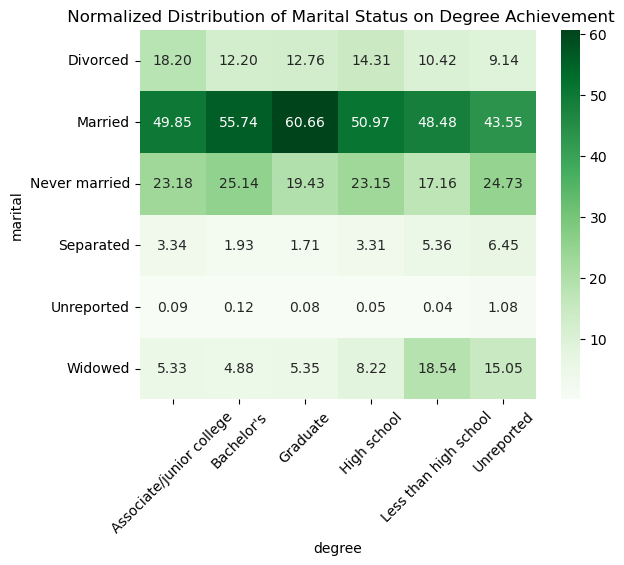

In [215]:
mrt4deg= pd.crosstab(gss['marital'],gss['degree'], normalize='columns')*100 #Crosstabulating marital status and degree achievement and normalizing by columns to reduce sample size bias
sns.heatmap(mrt4deg, annot=True, cmap="Greens", fmt=".2f") #Creating a heatmap with this data
plt.title(' Normalized Distribution of Marital Status on Degree Achievement') #Adding a title
plt.xticks(rotation=45) #Rotating the ticks to easily read labels

#### Analysis Write-Up ####

Age Analysis: The mean age of respondents that responded to the GSS survey from 1972-2022 is 46 years old. The violin plot is very "bottom heavy" meaning that the data really centered around this mean and targeted adults in their 20s, 30s, and 40s. The plot gets thinner as the ages get higher, meaning a smaller proportion of respondents were much older (70s-90s). This could definitely have to do with accessbility to the survey.

Marital status and age: The kernel density plot of ages of respondents distinguished by marital status shows many patterns, most of which are expected. The highest concentration of area for "never married" is skewed left towards the younger ages. Young people are more likely to never have been married, since it's a cultural norm to wait until your mid 20s-30s to tie the knot. "Divorced" hits its peak around mid 40s-50. This could likely be due to what people call the "mid-life crisis." Divorce doesn't really happen as often in young marriages as people strive to make their relationships work. Additionally, in their 40s-50s is when people have faced the obstacle of raising kids. This is often known to put a strain on marriage. The "widowed" peak hit's maximum area density around 80 years old. This is also expected since older people are more likely to die, leaving their partner alone. It's interesting to see that the "married" area stays pretty consistent, but has a slight skew left towards the younger marriage. This is probably due to "widowed" and "divorce" respondents increasing around later life.


Divorce Timeline: The divorce timeseries here is meant to examine the occurences of divorce from 1972-2022. The rate of divorce has increased significantly over the years. It peaks drastically around 2007-2008. This could be do due the 2008 recession, which definitely put monetary pressures on couples. There is a similar peak around 2020, the year of the COVID-19 pandemic, when people were similarly experiencing a financial crisis and quarantine. Families were forced to stay together in close quarters, and many people got laid off. As a result, it's not surprising that this tested some marriages.


Children and Education Level: This cross tabulation normalized by row shows really interesting patterns about the number of children in a household and the respondent's education level. Respondents with high school education or below seem to be more likely to have many children. They are the most likely, for example, to have 8 or more children, out of any of the education levels. Adults with a college education and graduate experience are more likely to have less children. This group of respondents is the most likely of all to have 0 children. "High school and below" and "Some college" seem to have an inverse correlation. This is not surprising to see, but it's interesting to see such conclusive data. People who go to college and progress through undergraduate and graduate education are more career oriented. They dedicate most of their time and resources to investing in career and stability. As a result, they are less likely to have a large number of children that would require their attention, and hinder their ability to work. People with high school and grade school educations did not spend the same aount of time investing in a career/education. As a result, they have more time to dedicate elsewhere, like for example children and family.

Children Per Respondent Comparison 1972 and 2022: With the popular culture today seeming to emphasize the value of profession and career, and steering away from the nuclear family, it was telling to analyze the number of children per respondent in the 1970s and 2020s. The general pattern and relative heights of the bars stay the same, but some increase in magnitude more than others. The proportion of households with 4 children seems to decrease between the two years, falling from around 12% to 8% of respondents with children.

Work status and degree achievement: People often seek to further education in order to get a good job and prosper. It was a natural course of action to compare work status across the survey with degree achievement. Cross tabulating the two allows to see how many respondents with certain degrees are in each category of work status (unemployed, on leave, working etc.). Most of the people working full time jobs seem to have gotten a high school degree. We find the percentage to be 50.63% of full-time working respondents. This makes sense, since people with no degree still have to find a means by which to live. They probably can't afford to be stay-at-home or go on prolonged leave. So, a smaller percentage of people with this degree, as opposed to others make up these categories, with respect to degree category.


Work status 1998-2018: The GSS data presented the perfect opportunity to examine relationships between variables and explore the impacts of the recession. The most imortant variable to look at here was wrkstat, for this presented the opportunity to filter by unemployment. Selecting a span of 20 years, in which 2008 fell in the middle, would allow for comparison of this variable as it related to surrounding years. The barplot shows that a greatest proportion of the surveyed population was unemployed and looking for work in 2010. This makes sense, since the recession would impact employment in 2008 and a few years beyond. Unemployment decreases from 2010 to 2018, most likely a sign of economic growth and recovery. The lowest proportion of surveyed adults occurs in 1998.

Unemployment per Degree: This graph shows unemployment counts over the years, separated by the degrees. The green line has the largest spike right at 2020. This pertains to respondents who achieved a high school degree. This is most likely due to the onset of the COVID pandemic. The people who were most suceptible to losing their jobs were those that worked regular, blue collar jobs in factories, stores, restaurants, and companies. As businesses shut down, these people had the least job security. The greatest number of respondents hold high school degrees, which is telling of how inaccessible a college education actually is for many adults. At the same time, those with college degrees experienced the greatest amount of stability (there are less spikes in unemployment over the years).

Marital Status and Degree Achievement: Using a heatmap is very useful, especially when the data is normalized on the rows. This allows to examine marital status across different categories of educational achievement. It is obvious according to this map that most adults responding to the GSS are married. Most married adults answering the GSS have achieved a graduate degree, and the greatest percent of divorce is seen in those with associates degrees. Most widowed people achieved high school degrees or less. This can be attributed to the changing access of education, and the older population that this is most definitely reflecting. Because most people who achieved only a high school degree and never went to college are older, it makes sense that the highest percentage of widowed respondents, at 18.54% of high school experience/less respondents, didn't experience a college education. Graduates being the highest percentage married, at 60.66% of the graduate category, makes sense since these respondents are further in life. This variable of degree achievement is also highly correlated upon age.

Overall, the GSS data is very consistent with what one would expect from analyzing it (at least in the simple analysis I did). It reaffirms a lot of my understanding about the impact of financial meltdown on work, and the likelihood of a human being married or not based on degree. It was especially interesting to witness visuals of the fall in unemployment around major economic hiccups, and the stability that a degree can provide in times like this. There are so many variables in the GSS, and further, more intense analysis could show more hiddne patterns in data about the everday American. 